# <center>Breast Cancer Prediction</center>
<center>Dataset source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data</center>
<br>
<center>The data consists of features computed from breast mass images and the corresponding diagnosis:<br>Malignant (M) or Benign (B)</center>
<br>
<center>We will use Logistic Regression for this binary classification</center>

### Import libraries and functions

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Read and format the dataset

In [2]:
data = pd.read_csv('data.csv')
print('#Rows:',data.shape[0],' #Columns:',data.shape[1])
data.head(3)

#Rows: 569  #Columns: 32


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
data["cancer"] = (data["diagnosis"]=='M').astype(int)

In [4]:
data.drop(['id','diagnosis'], axis=1, inplace=True)

In [5]:
data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


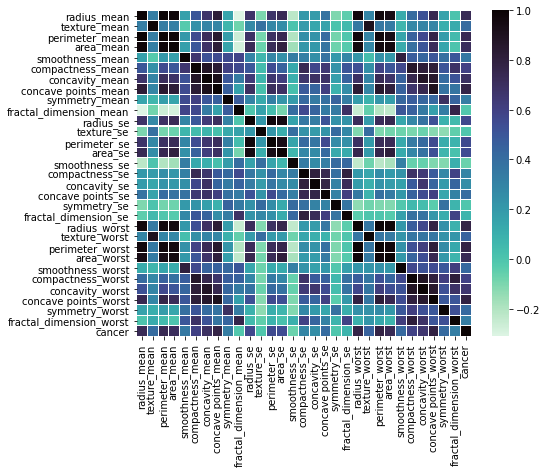

In [6]:
plt.figure(figsize=(7.5,6))
sns.heatmap(data.corr(), cmap="mako_r", linewidths=0.01);

In [7]:
print("Features with highest correlation with cancer:")
data.corr()["cancer"].sort_values(ascending=False)[1:6]

Features with highest correlation with cancer:


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: cancer, dtype: float64

In [8]:
data.describe().head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918


### Logistic Regression

In [9]:
X = data.drop(["cancer"], axis=1)
y = data["cancer"]

In [10]:
lr = LogisticRegression()

In [11]:
scaler = MinMaxScaler()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.iloc[0].values

array([ 13.74    ,  17.91    ,  88.12    , 585.      ,   0.07944 ,
         0.06376 ,   0.02881 ,   0.01329 ,   0.1473  ,   0.0558  ,
         0.25    ,   0.7574  ,   1.573   ,  21.47    ,   0.002838,
         0.01592 ,   0.0178  ,   0.005828,   0.01329 ,   0.001976,
        15.34    ,  22.46    ,  97.19    , 725.9     ,   0.09711 ,
         0.1824  ,   0.1564  ,   0.06019 ,   0.235   ,   0.07014 ])

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_train[0]

array([0.29624369, 0.27730808, 0.28381849, 0.1778941 , 0.16780652,
       0.15197589, 0.06750234, 0.06605368, 0.16337427, 0.12299916,
       0.0501539 , 0.12084702, 0.03844885, 0.02739644, 0.0060078 ,
       0.10265269, 0.04494949, 0.1103997 , 0.10093695, 0.03735334,
       0.24347635, 0.2782516 , 0.21707081, 0.12462783, 0.11563981,
       0.16388145, 0.17312375, 0.21839623, 0.15474078, 0.12800949])

In [16]:
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(scaler.transform(X_test))

### Training set accuracy

In [18]:
print("1) Accuracy:", round(accuracy_score(y_train, train_pred),4))
print("2) F1 Score:", round(f1_score(y_train, train_pred),4))
print("3) Confusion Matrix:")
print(confusion_matrix(y_train, train_pred))

1) Accuracy: 0.9673
2) F1 Score: 0.9547
3) Confusion Matrix:
[[248   1]
 [ 12 137]]


### Testing set accuracy

In [19]:
print("1) Accuracy:", round(accuracy_score(y_test, test_pred),4))
print("2) F1 Score:", round(f1_score(y_test, test_pred),4))
print("3) Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))

1) Accuracy: 0.9649
2) F1 Score: 0.9508
3) Confusion Matrix:
[[107   1]
 [  5  58]]
